First we need to retrieve the DataFrame:

In [1]:
from insight_analyzer import *

analyzer = ClusterAnalyzer("68cdce03-9e6c-466b-9205-35a9d45fef61", workspace="gdc_demo_11354ed4-f8f4-4286-9df7-50371b564d28")
df = analyzer.get_df()

Let's preview the data:

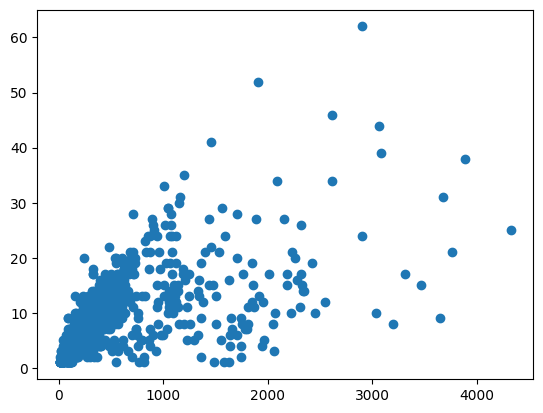

In [2]:
plt.scatter(
    df[df.columns[0]],
    df[df.columns[1]]
)
plt.show()

Ok, looks good, now let's setup our predictor:

In [3]:
# Threshold for cluster proximity, lower promotes splitting
threshold = 0.03
# Clustercount
cluster_count = 5

# We need to update our DF to be compatible with Birch
x = np.column_stack((df[df.columns[0]], df[df.columns[1]]))

model = Birch(threshold=threshold, n_clusters=cluster_count)
yhat = model.fit_predict(x)


Now let's preview the clusters!

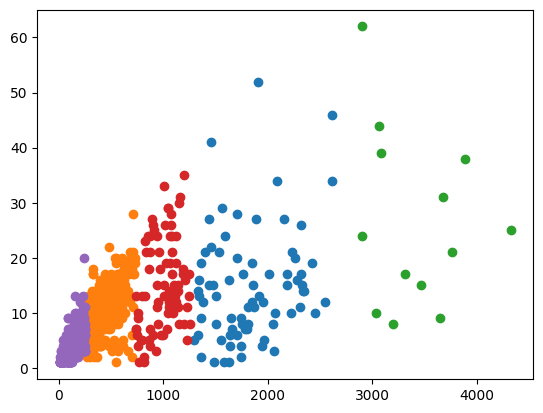

In [4]:
for cluster in np.unique(yhat):
    plt.scatter(df.values[yhat == cluster, 0], df.values[yhat == cluster, 1])
plt.show()

Altough this looks promising, we will get better results, if we normalize the coordinates. To do so, let's use the `MinMaxScaler`

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
normalized_df = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_df, columns=df.columns)


Ok, we can run our predictor again

In [6]:
# Threshold for cluster proximity, lower promotes splitting
threshold = 0.03
# Clustercount
cluster_count = 5

# We need to update our DF to be compatible with Birch
x = np.column_stack(
    (normalized_df[normalized_df.columns[0]],
     normalized_df[normalized_df.columns[1]])
)

model = Birch(threshold=threshold, n_clusters=cluster_count)
yhat = model.fit_predict(x)

And preview the updated clusters

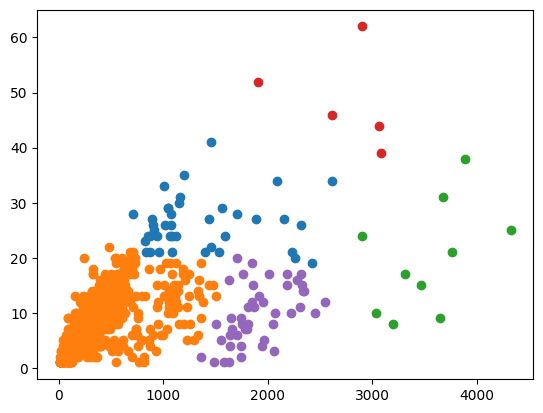

In [7]:
for cluster in np.unique(yhat):
    plt.scatter(df.values[yhat == cluster, 0], df.values[yhat == cluster, 1])
plt.show()

Now the only thing is to propagate these clusters to the server so we can view them on the dashboard

In [8]:
analyzer.push_to_server(yhat)

'{"clusters": [[[1556.77, 29.0], [1459.38, 41.0], [1008.0, 33.0], [1044.69, 29.0], [1015.01, 26.0], [1085.69, 24.0], [962.11, 21.0], [902.98, 26.0], [2087.66, 34.0], [2256.43, 20.0], [870.41, 21.0], [1123.66, 24.0], [1153.57, 30.0], [2420.93, 19.0], [936.04, 24.0], [1705.46, 28.0], [1889.64, 27.0], [1593.15, 24.0], [1459.22, 22.0], [822.12, 23.0], [830.58, 21.0], [1082.94, 21.0], [1161.94, 31.0], [849.1, 24.0], [2608.57, 34.0], [1065.02, 24.0], [2153.54, 27.0], [872.61, 24.0], [712.31, 28.0], [1074.35, 26.0], [1074.79, 28.0], [2315.63, 26.0], [1402.21, 21.0], [909.7, 25.0], [888.93, 27.0], [1532.19, 21.0], [1437.3, 27.0], [1193.33, 35.0], [1048.22, 29.0], [2231.05, 21.0]], [[100.75, 2.0], [423.79, 13.0], [337.85, 6.0], [699.35, 20.0], [330.55, 6.0], [84.09, 3.0], [449.79, 11.0], [484.54, 4.0], [74.96, 4.0], [20.61, 1.0], [284.05, 9.0], [681.45, 12.0], [88.11, 5.0], [230.56, 10.0], [330.63, 9.0], [173.82, 8.0], [46.19, 2.0], [198.24, 10.0], [20.64, 1.0], [301.85, 6.0], [103.42, 3.0], [3